In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
sns.set_style("darkgrid", {'grid.linestyle':'--'})
sns.set_context("paper")

In [5]:
n = 100

def true_func(x):
    z = 1-48*x + 218*x**2 - 315*x**3 + 145*x**4
    return z

def linear_func(x):
    z = x
    return z

No handles with labels found to put in legend.


data.shape: (100,) target.shape:(100,)


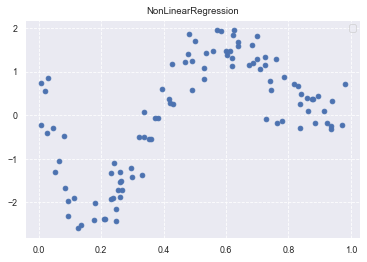

In [52]:
#　真のデータからノイズを伴うデータを生成

#　真の関数からデータを生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

#　ノイズを抑える
noise = 0.5 * np.random.randn(n)
target = target + noise
print('data.shape: %s target.shape:%s' % (data.shape, target.shape))

#　ノイズ付きデータをプロット
plt.scatter(data, target)
plt.title('NonLinearRegression')
plt.legend(loc='best')

data.shape: (100, 1) target.shape:(100, 1)
0.3195209378884114


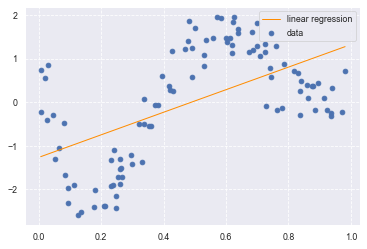

In [60]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
clf.fit(data, target)
print('data.shape: %s target.shape:%s' % (data.shape, target.shape))

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend(loc='best')
print(clf.score(data, target))

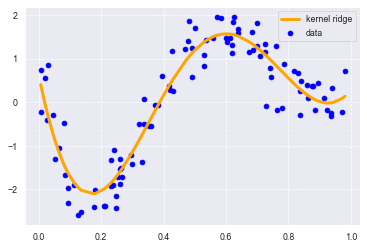

In [74]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha = 0.0002, kernel = 'rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', marker='', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend(loc='best')

0.8654204455336028


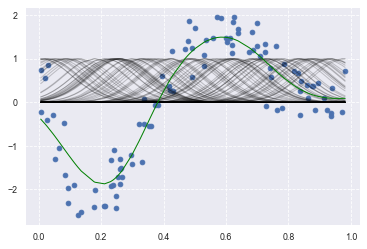

In [78]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)

clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target, label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

plt.plot(data, p_ridge, color='green',marker='', linestyle='-', linewidth=1, markersize=3, label='ridge regression')

print(clf.score(kx, target))